# Importacion de librerias y de Dataframes

In [2]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
df_vent_prod = pd.read_csv("ventasConProductos_E.csv")
del df_vent_prod['Unnamed: 0']
df_vent_prod

,WEEK,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,ITEM_DESCRIPTION
0,34-22,7501058792808BP2,0.006,0.139,1.000,total autos area 5,vanishoxiactionrosadoypack120gr+mmcrystalwhite...
1,34-22,7501058715883,0.487,116.519,2.916,total autos area 5,vanish oxi action gold quitamanchas bolsa 1.8k...
2,34-22,7702626213774,1.391,68.453,5.171,total autos area 5,vanish oxi action rosa quitamanchas doypack 24...
3,34-22,7501058716422,0.022,1.481,1.833,total autos area 5,vanish oxi action gold quitamancha ahorro del ...
4,34-22,7501058784353,2.037,182.839,5.375,total autos area 5,vanish intelligence polvo bote 450 gr nal 7501...
...,...,...,...,...,...,...,...
121997,26-23,7501058792778BP1,1.192,150.829,4.000,total autos scanning mexico,vanishoxiactionrosabote900gr+mmcrystalwhitedoy...
121998,26-23,7501058757630,1.947,235.416,2.797,total autos scanning mexico,vanish poder o2 pre-lavador bot.atom. 650 ml n...
121999,26-23,7501058753441,18.013,429.289,9.102,total autos scanning mexico,vanish poder o2 doypack 120 gr 7501058753441
122000,26-23,7702626204208BP1,21.152,210.276,22.172,total autos scanning mexico,vanish poder 02 inteligence sin cloro sobre 30...


# Visualizar la distribución de ventas:

In [5]:
# Crea gráficos de distribución (histogramas o boxplots) para visualizar la distribución de
# ventas por diferentes categorías. Esto ayudará a identificar patrones de ventas y posibles outliers.

In [7]:
df_vent22 = df_vent_prod[df_vent_prod['WEEK'].str.endswith('22')]
df_vent22_vanish = df_vent22[df_vent22['ITEM_DESCRIPTION'].str.startswith('vanish')]
df_vent22_cloro = df_vent22[df_vent22['ITEM_DESCRIPTION'].str.startswith('clor')]
df_vent22_otros = df_vent22[~df_vent22['ITEM_DESCRIPTION'].str.startswith(('clor','vanish'))] # nota si son x>1 valores poner en una tupla

df_vent23 = df_vent_prod[df_vent_prod['WEEK'].str.endswith('23')]
df_vent23_vanish = df_vent23[df_vent23['ITEM_DESCRIPTION'].str.startswith('vanish')]
df_vent23_cloro = df_vent23[df_vent23['ITEM_DESCRIPTION'].str.startswith('clor')]
df_vent23_otros = df_vent23[~df_vent23['ITEM_DESCRIPTION'].str.startswith(('clor','vanish'))] # nota si son x>1 valores poner en una tupla


/var/folders/c2/0hk0hmxd4zngvs6gpgdr_4qc0000gn/T/ipykernel_42413/1662150329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_vent22, y = 'TOTAL_VALUE_SALES', x = 'REGION', palette = 'pastel')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'total autos area 5'),
  Text(1, 0, 'total autos area 6'),
  Text(2, 0, 'total autos scanning mexico'),
  Text(3, 0, 'total autos area 3'),
  Text(4, 0, 'total autos area 2'),
  Text(5, 0, 'total autos area 1'),
  Text(6, 0, 'total autos area 4')])

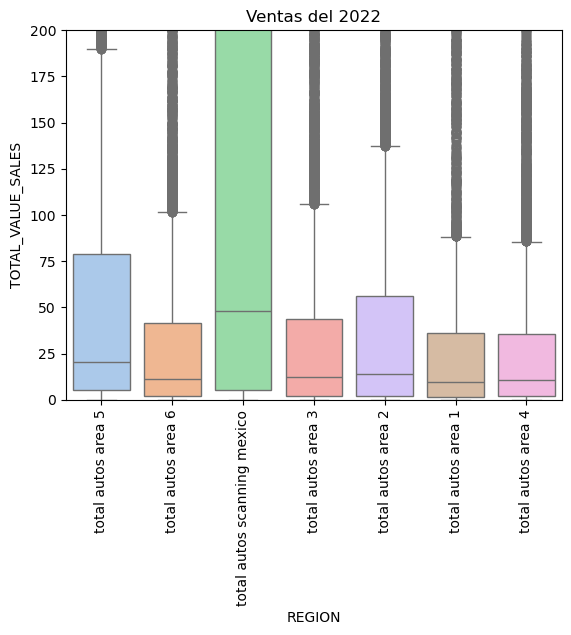

In [9]:
# Ventas del 2022
sns.boxplot(data = df_vent22, y = 'TOTAL_VALUE_SALES', x = 'REGION', palette = 'pastel')
plt.title('Ventas del 2022')
plt.ylim(0,200)
plt.xticks(rotation = 90)

/var/folders/c2/0hk0hmxd4zngvs6gpgdr_4qc0000gn/T/ipykernel_42413/267136593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_vent23, y = 'TOTAL_VALUE_SALES', x = 'REGION', palette = 'pastel')


(0.0, 200.0)

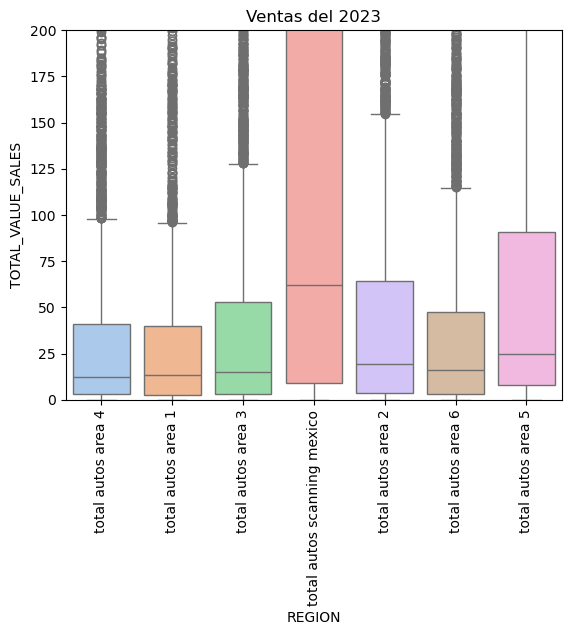

In [11]:
# Ventas del 2023
sns.boxplot(data = df_vent23, y = 'TOTAL_VALUE_SALES', x = 'REGION', palette = 'pastel')
plt.title('Ventas del 2023')
plt.xticks(rotation = 90)
plt.ylim(0,200)

<function matplotlib.pyplot.show(close=None, block=None)>

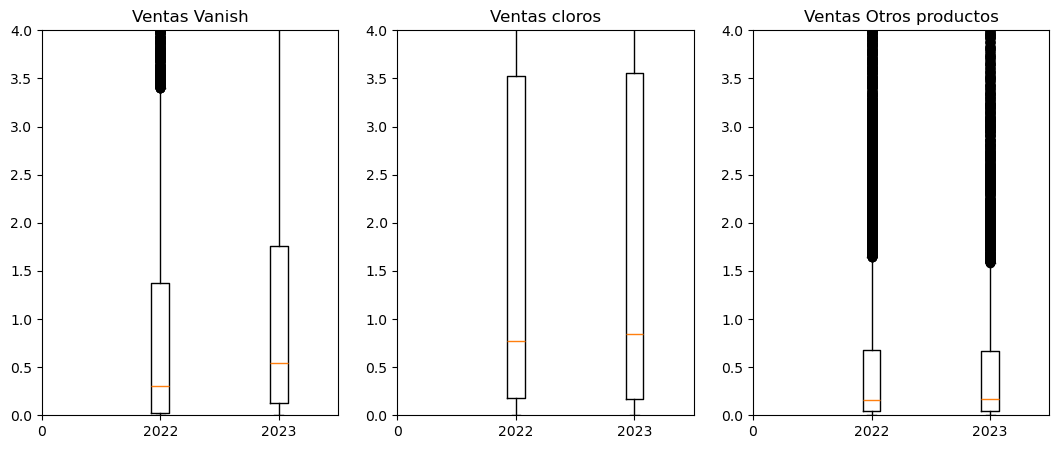

In [13]:
# Distribucion por diferentes categorias
fig, ax = plt.subplots(1,3, figsize=(13, 5))
for a in ax:
    a.set_ylim(0, 4) 
ax[0].boxplot([df_vent22_vanish['TOTAL_UNIT_SALES'], df_vent23_vanish['TOTAL_UNIT_SALES']])
ax[1].boxplot([df_vent22_cloro['TOTAL_UNIT_SALES'], df_vent23_cloro['TOTAL_UNIT_SALES']])
ax[2].boxplot([df_vent22_otros['TOTAL_UNIT_SALES'], df_vent23_otros['TOTAL_UNIT_SALES']])
ax[0].set_title("Ventas Vanish")
ax[1].set_title("Ventas cloros")
ax[2].set_title("Ventas Otros productos")
ax[0].set_xticks([0, 1, 2])
ax[0].set_xticklabels(["0", "2022", "2023"])
ax[1].set_xticks([0, 1, 2])
ax[1].set_xticklabels(["0", "2022", "2023"])
ax[2].set_xticks([0, 1, 2])
ax[2].set_xticklabels(["0", "2022", "2023"])
plt.show

# Analizar la tendencia de ventas en el tiempo:

In [16]:
# Genera gráficos de líneas que muestren las tendencias de ventas a lo largo del tiempo.Filtra las ventas
# por diferentes productos, regiones o segmentos para analizar cómo han cambiado las ventas a lo largo del tiempo.

/var/folders/c2/0hk0hmxd4zngvs6gpgdr_4qc0000gn/T/ipykernel_42413/2121796225.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_vent22, x = 'WEEK', y = 'TOTAL_UNIT_SALES', palette = 'pastel')


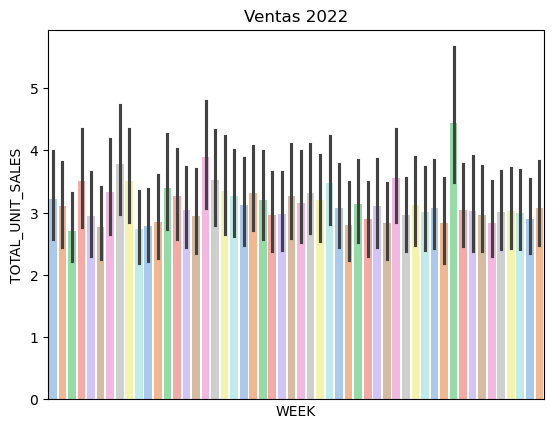

In [18]:
sns.barplot(data = df_vent22, x = 'WEEK', y = 'TOTAL_UNIT_SALES', palette = 'pastel')
plt.title("Ventas 2022")
plt.xticks([])
plt.show()

/var/folders/c2/0hk0hmxd4zngvs6gpgdr_4qc0000gn/T/ipykernel_42413/598398844.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_vent23, x = 'WEEK', y = 'TOTAL_UNIT_SALES', palette = 'pastel')


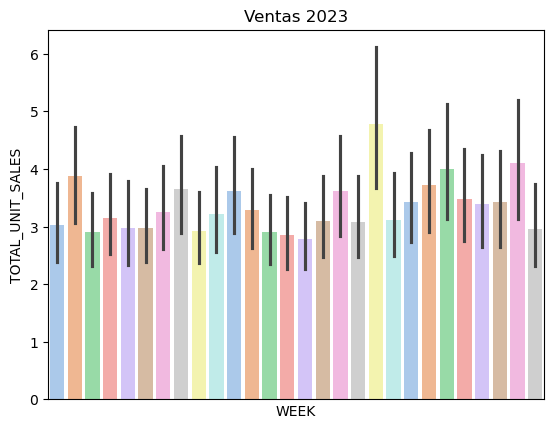

In [20]:
sns.barplot(data = df_vent23, x = 'WEEK', y = 'TOTAL_UNIT_SALES', palette = 'pastel')
plt.title("Ventas 2023")
plt.xticks([])
plt.show()

In [22]:
# Agrupar por columna(semanas) y calcular el promedio
df_agrup22 = df_vent22.groupby('WEEK')[['TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES', 'TOTAL_UNIT_AVG_WEEKLY_SALES']].mean().reset_index()
df_agrup23 = df_vent23.groupby('WEEK')[['TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES', 'TOTAL_UNIT_AVG_WEEKLY_SALES']].mean().reset_index()

/var/folders/c2/0hk0hmxd4zngvs6gpgdr_4qc0000gn/T/ipykernel_42413/3674727235.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/var/folders/c2/0hk0hmxd4zngvs6gpgdr_4qc0000gn/T/ipykernel_42413/3674727235.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


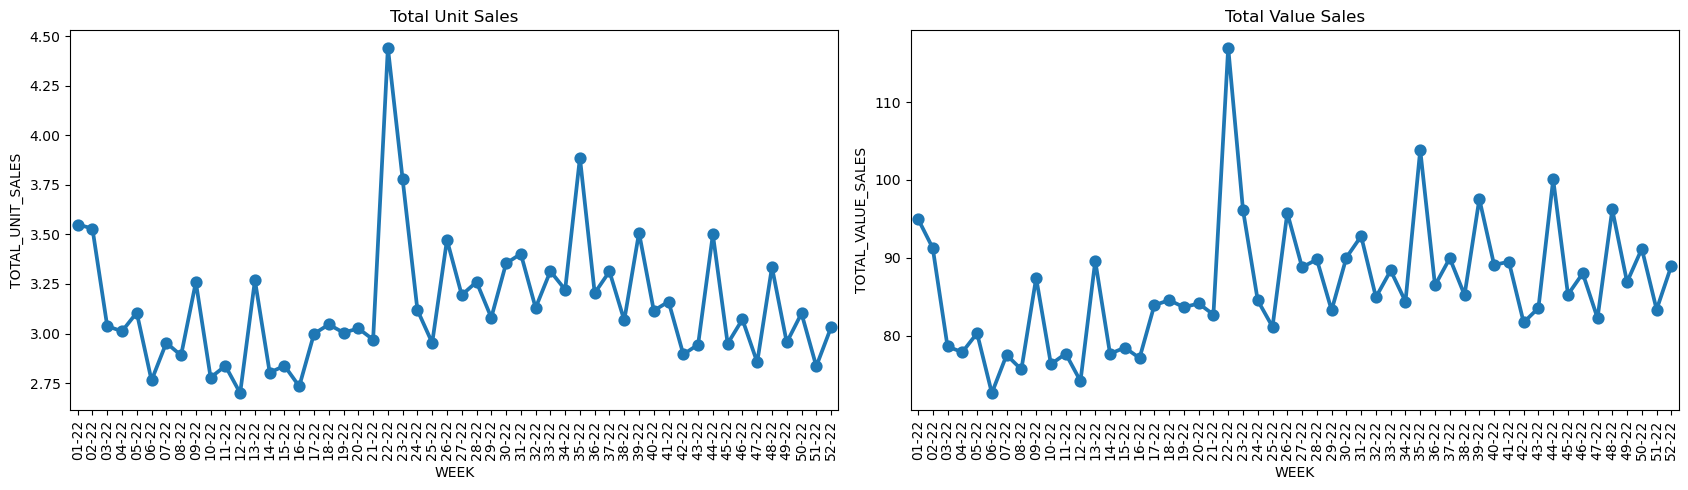

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))
# Datos semanas 2022
sns.pointplot(data=df_agrup22, y='TOTAL_UNIT_SALES', x='WEEK', ax=ax1)
ax1.set_title("Total Unit Sales")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
# Datos semanas 2023
sns.pointplot(data=df_agrup22, y='TOTAL_VALUE_SALES', x='WEEK', ax=ax2)
ax2.set_title("Total Value Sales")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.tight_layout() 
plt.show()

# Explorar la relación entre diferentes variables:

In [27]:
# Utiliza gráficos de dispersión (scatter plots) para investigar relaciones entre variables clave.
# Esto puede ayudar a identificar correlaciones significativas entre diferentes variables.(ventas)

/var/folders/c2/0hk0hmxd4zngvs6gpgdr_4qc0000gn/T/ipykernel_42413/4274261026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data = df_agrup22, y = 'TOTAL_UNIT_SALES', x = 'TOTAL_VALUE_SALES', jitter = True, palette = "Set2")


<function matplotlib.pyplot.show(close=None, block=None)>

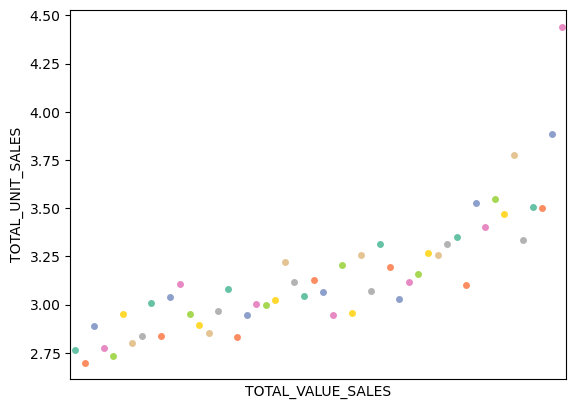

In [29]:
# Relacion entre variables "TOTAL_UNIT_SALES" y "TOTAL_VALUE_SALES"
fig, ax = plt.subplots()
sns.stripplot(data = df_agrup22, y = 'TOTAL_UNIT_SALES', x = 'TOTAL_VALUE_SALES', jitter = True, palette = "Set2") 
ax.axes.xaxis.set_ticks([])
plt.show

<Axes: xlabel='TOTAL_UNIT_AVG_WEEKLY_SALES', ylabel='TOTAL_VALUE_SALES'>

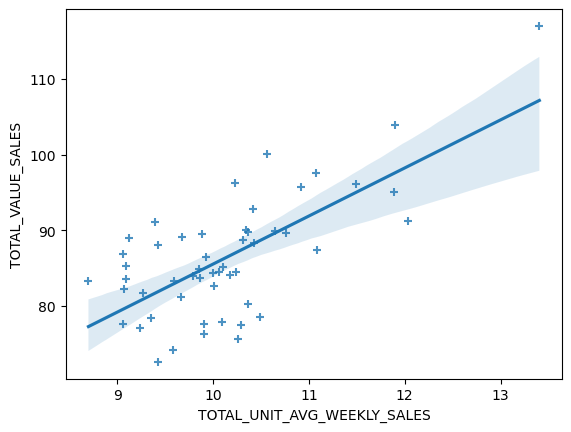

In [31]:
# Relacion entre variables "TOTAL_VALUE_SALES" y "TOTAL_UNIT_AVG_WEEKLY_SALES"
sns.regplot(data = df_agrup22, y = 'TOTAL_VALUE_SALES', x = 'TOTAL_UNIT_AVG_WEEKLY_SALES', marker = '+') 

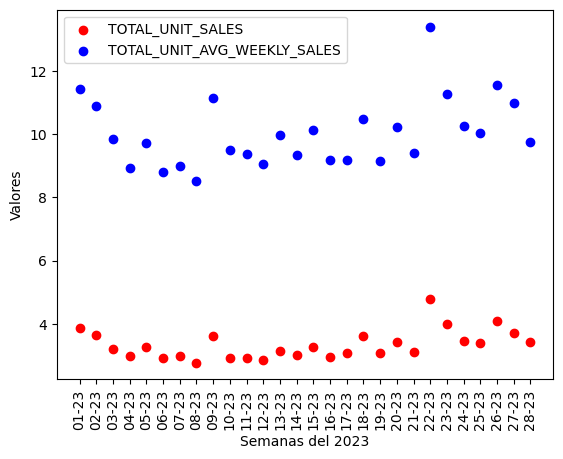

In [33]:
# Relacion entre las variables "TOTAL_UNIT_AVG_WEEKLY_SALES" y "TOTAL_UNIT_SALES"
fig, ax = plt.subplots()
ax.scatter(df_agrup23["WEEK"], df_agrup23["TOTAL_UNIT_SALES"], color = 'red', label = 'TOTAL_UNIT_SALES')
ax.scatter(df_agrup23["WEEK"], df_agrup23["TOTAL_UNIT_AVG_WEEKLY_SALES"], color = 'blue', label = 'TOTAL_UNIT_AVG_WEEKLY_SALES')
ax.set_xlabel('Semanas del 2023')
ax.set_ylabel('Valores')
ax.legend()
plt.xticks(rotation = 90)
plt.show()

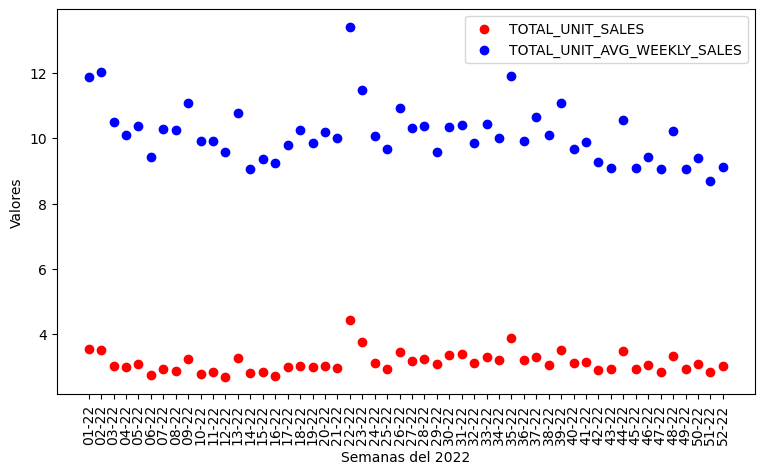

In [35]:
# relacion entre las variables "TOTAL_UNIT_AVG_WEEKLY_SALES" y "TOTAL_UNIT_SALES"
fig, ax = plt.subplots(figsize=(9, 5))
ax.scatter(df_agrup22["WEEK"], df_agrup22["TOTAL_UNIT_SALES"], color = 'red', label = 'TOTAL_UNIT_SALES')
ax.scatter(df_agrup22["WEEK"], df_agrup22["TOTAL_UNIT_AVG_WEEKLY_SALES"], color = 'blue', label = 'TOTAL_UNIT_AVG_WEEKLY_SALES')
ax.set_xlabel('Semanas del 2022')
ax.set_ylabel('Valores')
ax.legend()
plt.xticks(rotation = 90)
plt.show()

# Visualizar la distribución geográfica de las ventas:

In [38]:
# Si es posible, utiliza mapas o gráficos de barras apiladas para visualizar las ventas por 
# región. Esto puede ayudar a identificar qué regiones tienen el mayor o menor rendimiento.

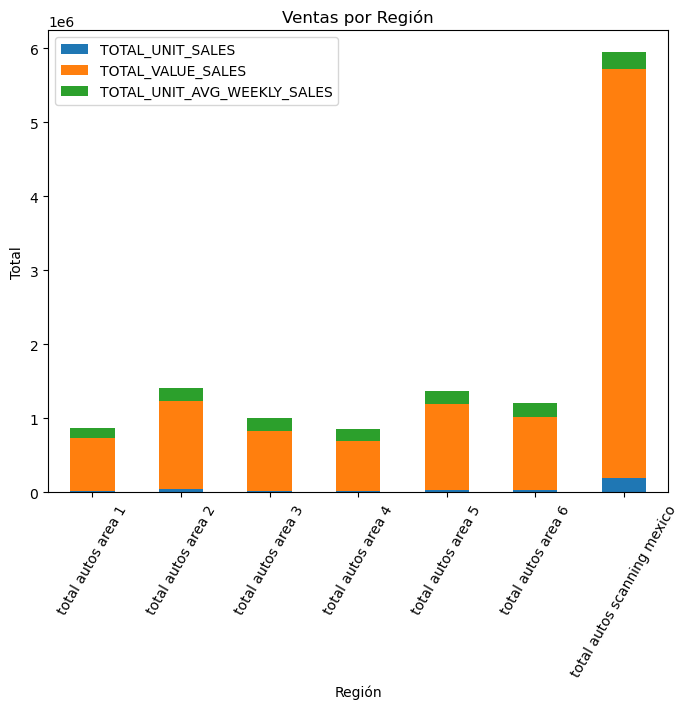

In [40]:
# Visualizacion de ventas por region
df_region = df_vent_prod.groupby('REGION')[['TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES', 'TOTAL_UNIT_AVG_WEEKLY_SALES']].sum()
df_region.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Total')
plt.xticks(rotation=60)
plt.show()

# Identificar posibles outliers y anomalías:

In [43]:
# Utiliza gráficos de caja (boxplots) para identificar posibles outliers en los datos de ventas
# por producto, categoría o región. Identificar outliers puede ayudar a entender mejor los patrones 
# inusuales o anómalos en los datos.

/var/folders/c2/0hk0hmxd4zngvs6gpgdr_4qc0000gn/T/ipykernel_42413/1016054613.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_vent22_vanish, x = 'WEEK', y = 'TOTAL_UNIT_SALES', palette = 'pastel')


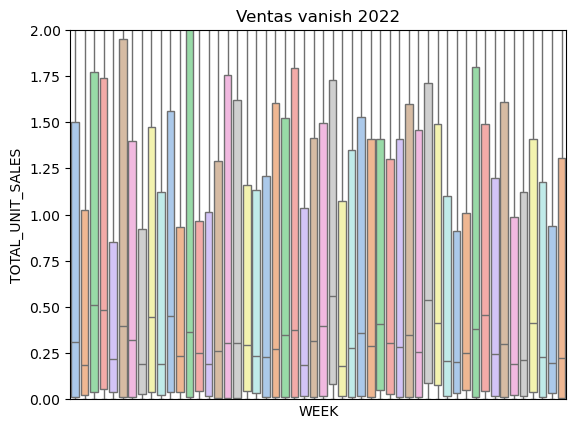

In [45]:
sns.boxplot(data = df_vent22_vanish, x = 'WEEK', y = 'TOTAL_UNIT_SALES', palette = 'pastel')
plt.title("Ventas vanish 2022")
plt.xticks(rotation=90)
plt.xticks([])
plt.ylim(0, 2)
plt.show()

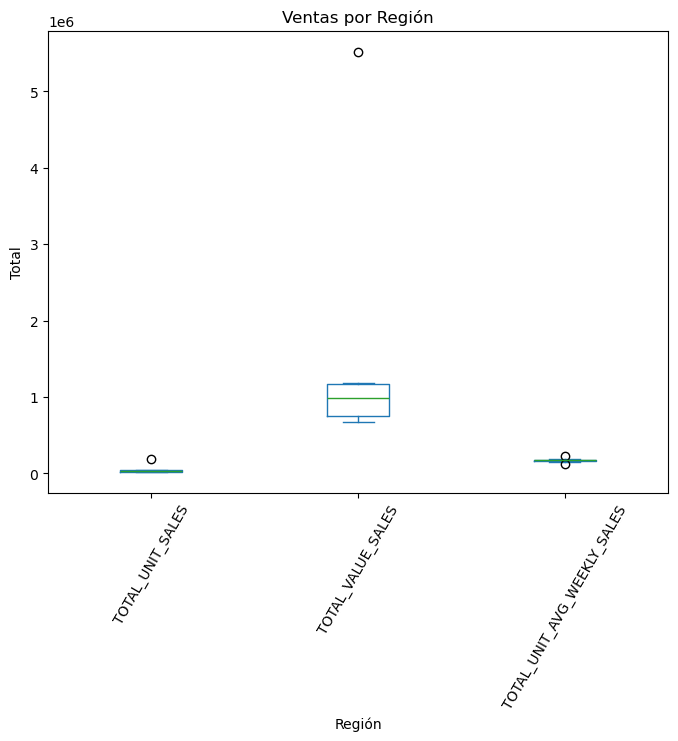

In [47]:
# Visualizador de las ventas por las diferentes regiones con boxplot
df_region.plot(kind='box', stacked=True, figsize=(8, 6))
plt.title('Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Total')
plt.xticks(rotation=60)
plt.show()

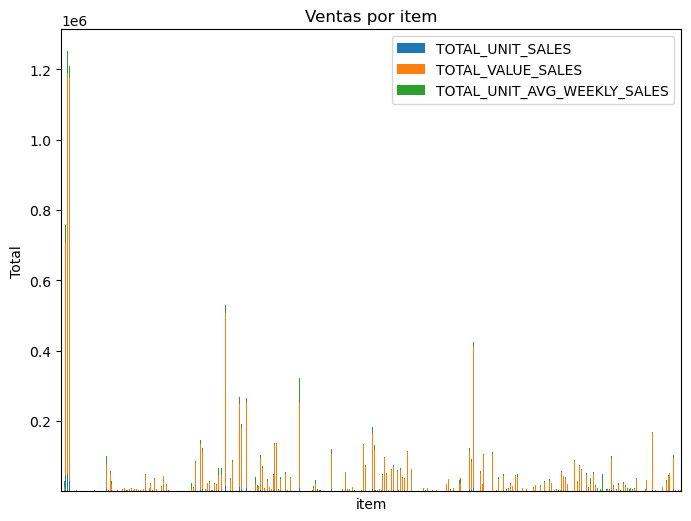

In [49]:
# Aqui se pueden ver algunas anomalias en algunos productos que son mas vendidos a comparacion de otros que no son muy vendidos
df_item = df_vent_prod.groupby('ITEM')[['TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES', 'TOTAL_UNIT_AVG_WEEKLY_SALES']].sum()
df_item.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Ventas por item')
plt.xlabel('item')
plt.xticks([])
plt.ylabel('Total')
plt.xticks(rotation=60)
plt.show()